In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data = pd.read_csv("G:\Gamze\ikçü\car_price_prediction.csv")
data.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [4]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [5]:
print('data shape before drop duplicated values:', data.shape)
data = data.drop_duplicates()
print('data shape after drop duplicated values:', data.shape)

data shape before drop duplicated values: (19237, 18)
data shape after drop duplicated values: (18924, 18)


In [6]:
data = data.drop(columns=['ID'])
data.head(3)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2


In [11]:
data['Levy'] = data['Levy'].replace('-', '0')
data['Levy'] = data['Levy'].astype(int)
print('The type of the Levy column is:', data['Levy'].dtype)
data.head(3)

The type of the Levy column is: int32


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2


In [12]:
data['Mileage'] = data['Mileage'].replace("km", "", regex=True)
data['Mileage'] = data['Mileage'].astype(int)

In [13]:
data['Engine volume'] = data['Engine volume'].replace("Turbo", "", regex=True)
data['Engine volume'] = data['Engine volume'].astype(float)
data.head(10)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931,4.0,Automatic,Front,04-May,Left wheel,White,4
6,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909,4.0,Automatic,Front,04-May,Left wheel,White,12
7,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,26657,0,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [18]:
lst_num = []
lst_cate = []
for col in data.columns:
    if(data[col].dtype != 'O'):
        lst_num.append(col)
    else:
        lst_cate.append(col)

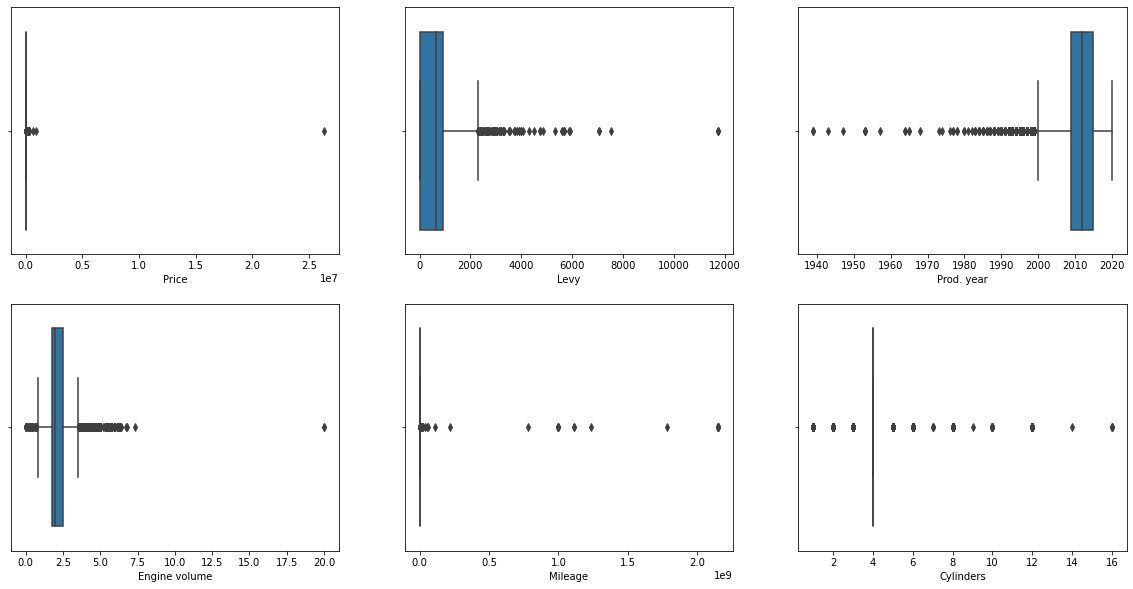

In [19]:
rows = 2
columns = 3
idx = 0
fig, axs = plt.subplots(rows, columns, figsize=(20,10))
for i in range(rows):
    for j in range(columns):
        sns.boxplot(ax=axs[i, j], data=data, x=lst_num[idx])
        idx += 1

In [20]:
#Yeo-Johnson dönüşümleri veri setinde negatif ve sıfır değere sahip gözlemler olduğunda kullanılır.

data['Price_fixed'], lmbda_price = stats.yeojohnson(data['Price'])
data['Mileage_fixed'], _ = stats.yeojohnson((data['Mileage']))
data['Cylinders_fixed'], _ = stats.yeojohnson(data['Cylinders'])
data['Levy_fixed'], _ = stats.yeojohnson(data['Levy'])
data['Engine volume_fixed'], _ = stats.yeojohnson(data['Engine volume'])

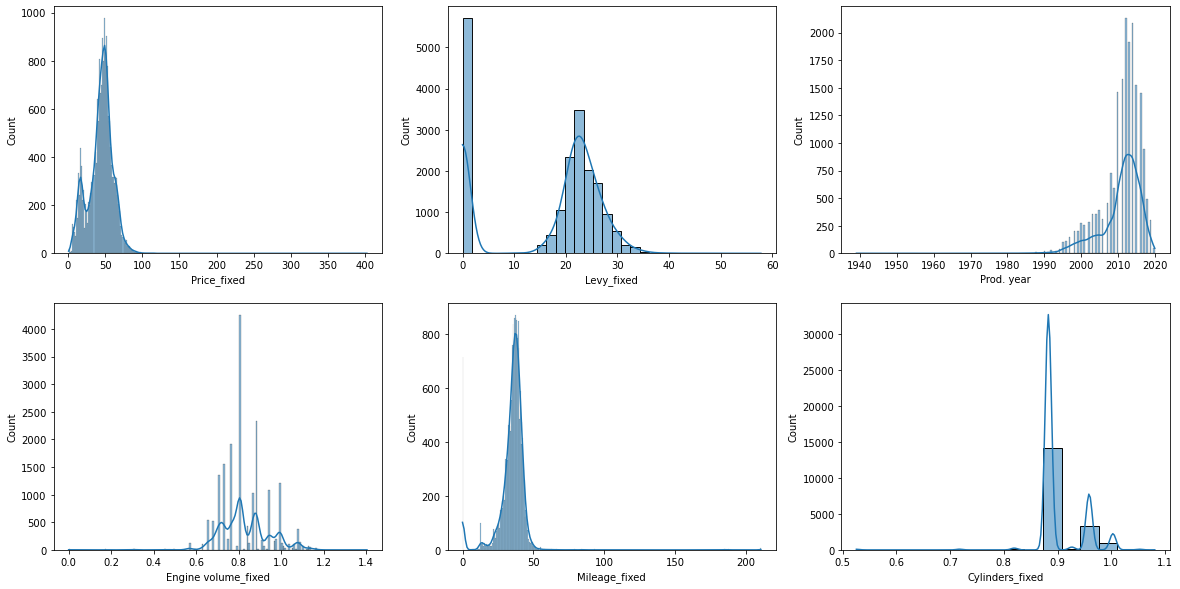

In [21]:
rows = 2
columns = 3
idx = 0
fig, axs = plt.subplots(rows, columns, figsize=(20,10))
for i in range(rows):
    for j in range(columns):
        if (lst_num[idx] != 'Prod. year'):
            col = lst_num[idx] + '_fixed'
        else:
            col = lst_num[idx]
        sns.histplot(ax=axs[i, j], data=data, x=col, kde=True)
        idx += 1

In [22]:
for i in range(len(lst_num)):
    lst_num[i] += '_fixed'
lst_num.remove('Prod. year_fixed')
lst_num.remove('Airbags_fixed')
lst_num.append('Prod. year')
lst_num.append('Airbags')

In [23]:
final_data = data.drop(columns=['Levy', 'Mileage', 'Cylinders', 'Engine volume'])
final_data.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price_fixed,Mileage_fixed,Cylinders_fixed,Levy_fixed,Engine volume_fixed
0,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,Automatic,4x4,04-May,Left wheel,Silver,12,46.291198,39.433841,0.958726,28.004994,0.992864
1,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,Tiptronic,4x4,04-May,Left wheel,Black,8,49.430219,39.675090,0.958726,25.031350,0.943123
2,8467,HONDA,FIT,2006,Hatchback,No,Petrol,Variator,Front,04-May,Right-hand drive,Black,2,40.412220,39.987434,0.882803,0.000000,0.656376
3,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,Automatic,4x4,04-May,Left wheel,White,0,31.166697,38.710917,0.882803,23.590618,0.882336
4,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,Automatic,Front,04-May,Left wheel,Silver,4,44.556485,34.388768,0.882803,18.573670,0.656376


In [24]:
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,...,Drive wheels,Doors,Wheel,Color,Airbags,Price_fixed,Mileage_fixed,Cylinders_fixed,Levy_fixed,Engine volume_fixed
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,...,4x4,04-May,Left wheel,Silver,12,46.291198,39.433841,0.958726,28.004994,0.992864
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,...,4x4,04-May,Left wheel,Black,8,49.430219,39.675090,0.958726,25.031350,0.943123
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,...,Front,04-May,Right-hand drive,Black,2,40.412220,39.987434,0.882803,0.000000,0.656376
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,...,4x4,04-May,Left wheel,White,0,31.166697,38.710917,0.882803,23.590618,0.882336
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,...,Front,04-May,Left wheel,Silver,4,44.556485,34.388768,0.882803,18.573670,0.656376


In [25]:
#kategorik değişkenleri kullanıma uygun hale getirdik.
encoder = LabelEncoder()
for col in lst_cate:
    final_data[col] = encoder.fit_transform(final_data[col])
final_data.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price_fixed,Mileage_fixed,Cylinders_fixed,Levy_fixed,Engine volume_fixed
0,13328,32,1242,2010,4,1,2,0,0,1,0,12,12,46.291198,39.433841,0.958726,28.004994,0.992864
1,16621,8,658,2011,4,0,5,2,0,1,0,1,8,49.430219,39.675090,0.958726,25.031350,0.943123
2,8467,21,684,2006,3,0,5,3,1,1,1,1,2,40.412220,39.987434,0.882803,0.000000,0.656376
3,3607,16,661,2011,4,1,2,0,0,1,0,14,0,31.166697,38.710917,0.882803,23.590618,0.882336
4,11726,21,684,2014,3,1,5,0,1,1,0,12,4,44.556485,34.388768,0.882803,18.573670,0.656376


In [26]:
X = final_data.drop(columns=['Price', 'Price_fixed'])
y = final_data['Price_fixed']

In [27]:
ord_encoder = OrdinalEncoder()
X = ord_encoder.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
models= [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), 
         KNeighborsRegressor(n_neighbors=11)]
scores= []
test_score = []
train_times = []
names= []

In [31]:
for model in models:
    start= time.time()
    scores.append(cross_val_score(model, X_train, y_train, scoring= 'r2', cv= 5).mean())
    end = time.time()
    train_times.append(end-start)
    names.append(model.__class__.__name__)

df= pd.DataFrame(scores, columns=['Score'], index= range(len(models)))
df.insert(1, 'Time', pd.Series(train_times))
df.insert(0, 'Model', pd.Series(names))
df

,Model,Score,Time
0,LinearRegression,0.195139,0.040999
1,DecisionTreeRegressor,0.435616,0.276002
2,RandomForestRegressor,0.702236,15.935001
3,KNeighborsRegressor,0.514224,2.087000


In [32]:
test_score = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    test_score.append(score)    
df['Test_Score'] = test_score
df

,Model,Score,Time,Test_Score
0,LinearRegression,0.195139,0.040999,0.181975
1,DecisionTreeRegressor,0.435616,0.276002,0.444542
2,RandomForestRegressor,0.702236,15.935001,0.665206
3,KNeighborsRegressor,0.514224,2.087000,0.499478
